# Mini Project
#Problem Statement: The company  wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes below. As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given.

Height – The height of the bag
Width – The width of the bag
Length – The length of the bag
Weight – The weight the bag can carry
Weight1 – Weight the bag can carry after expansion

In [298]:
# module Import

In [299]:
# pandas for dataframe
import pandas as pd  

# for plotting a graph
import matplotlib.pyplot as plt

# for splitting the data into train and test.
from sklearn.model_selection import train_test_split

# to scale the values
from sklearn.preprocessing import StandardScaler

# api for linear regression by solving normal equations
from sklearn.linear_model import LinearRegression

# api for Stochastic gradient descent algorithm
from sklearn.linear_model import SGDRegressor

# visualization
import seaborn as sns 

# ndimensional arrays
import numpy as np

# stats
from scipy import stats

# metrics
from sklearn import metrics

# to tell jupyter to display graphs inline
%matplotlib inline

In [300]:
# download the dataset to the working directory:
#In this case the dataset is stored in below directory:

#To execute the below python implementation, please change the path to the appropriate 
#directory in the "path" variable to run the program:

path = "C:\\Users\\yasha\\Desktop\\BITS\\Mini_Project_1\\"
file = "Data_miniproject.csv"
filepath=path+file

# display path
print(filepath)

C:\Users\yasha\Desktop\BITS\Mini_Project_1\Data_miniproject.csv


In [301]:
# read the data from csv from a panda function read_csv
# store the data in a data frame, call it bagdata

bagdata = pd.read_csv(filepath)

## Exploratory Data Analysis

In [302]:
# describe provides the statistical data
bagdata.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


    # Inference : 
    #There is a zero cost as minimum
    #The max value of cost is way beyond the mean.

In [303]:
# read top 5 rows of the dataframe.
bagdata.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [304]:
# check for all the data types, to understand the need for scaling.
bagdata.dtypes

Cost       float64
Weight     float64
Weight1    float64
Length     float64
Height     float64
Width      float64
dtype: object

In [305]:
# check for duplicate rows in the data
duplicate_rows_bagdata = bagdata[bagdata.duplicated()]
duplicate_rows_bagdata

,Cost,Weight,Weight1,Length,Height,Width


    # Inference:
    # No duplicate row exists.

In [306]:
# check for nulls in the data set.
print(bagdata.isnull().sum())

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64


In [307]:
# Dropping the missing values.
bagdata = bagdata.dropna() 
bagdata.count()

Cost       159
Weight     159
Weight1    159
Length     159
Height     159
Width      159
dtype: int64

    #Inference:  No nulls present in the data.

# Outlier Detection

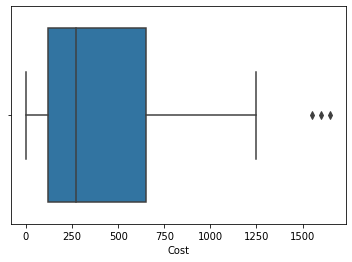

In [308]:
sns.boxplot(bagdata['Cost'])
plt.show()

#Inference

    Cost with value greater than 1250 can be considered as outliers.
    So we remove them

In [309]:
# Cost is our Reponse/Target
# delete all rows for which column 'Cost' has value greater than 1250

indexNames = bagdata[(bagdata['Cost'] >= 1250)].index
bagdata = bagdata.drop(indexNames)

In [310]:
# delete all rows for which column 'Cost' has zero, as Zero cost makes no sense

ind = bagdata[(bagdata['Cost'] == 0)].index
bagdata = bagdata.drop(ind)

In [311]:
# Al other features other than Cost are our features.
# in order for us to detect outliers on the features, create a a newdf with all other features.

nbagdata = bagdata.drop(columns=['Cost'])

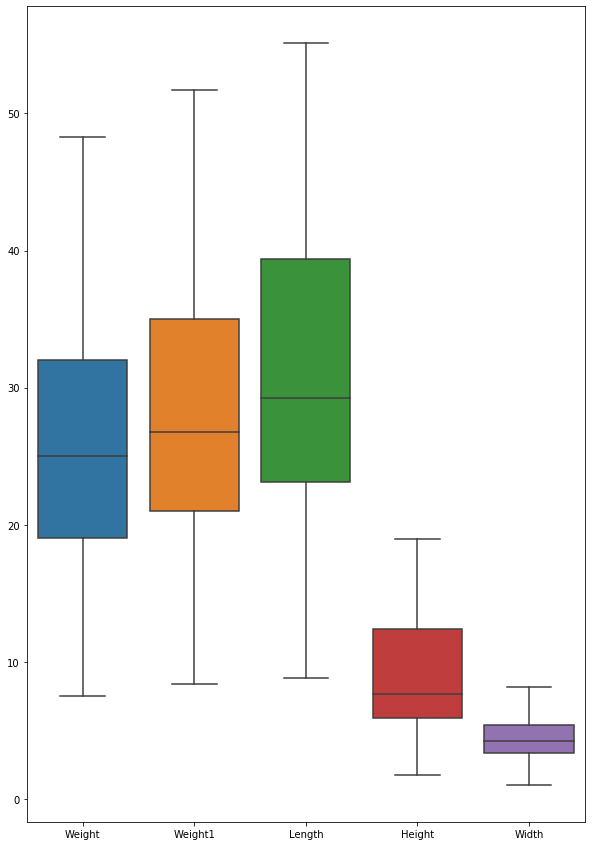

In [312]:
plt.figure(figsize=(10,15))
sns.boxplot(data=nbagdata)
plt.show()

    #Inference :
    # No Other outliers found for the features.

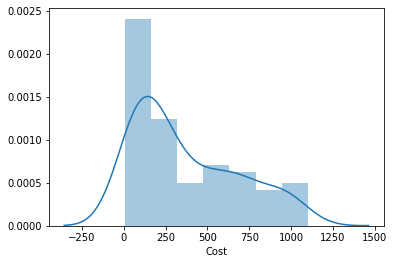

In [313]:
# cost shows a normal distribution over the given axis
sns.distplot(bagdata['Cost'])
plt.show()

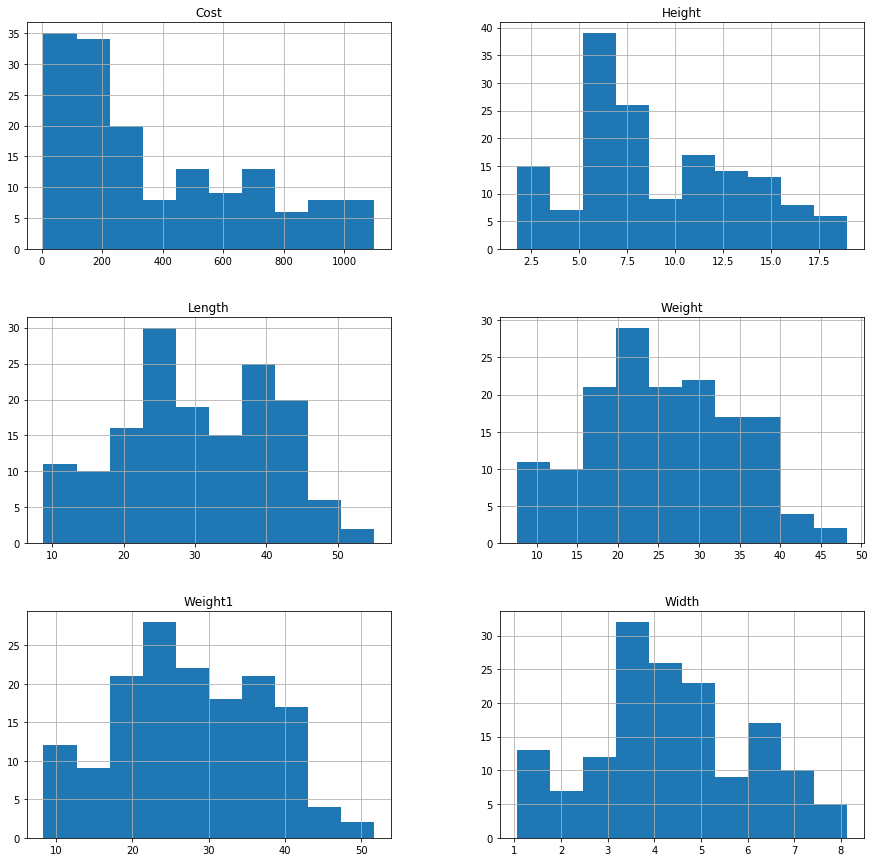

In [314]:
# histogram to show the distribution of various features.

bagdata.hist(figsize=(15,15))
plt.show()

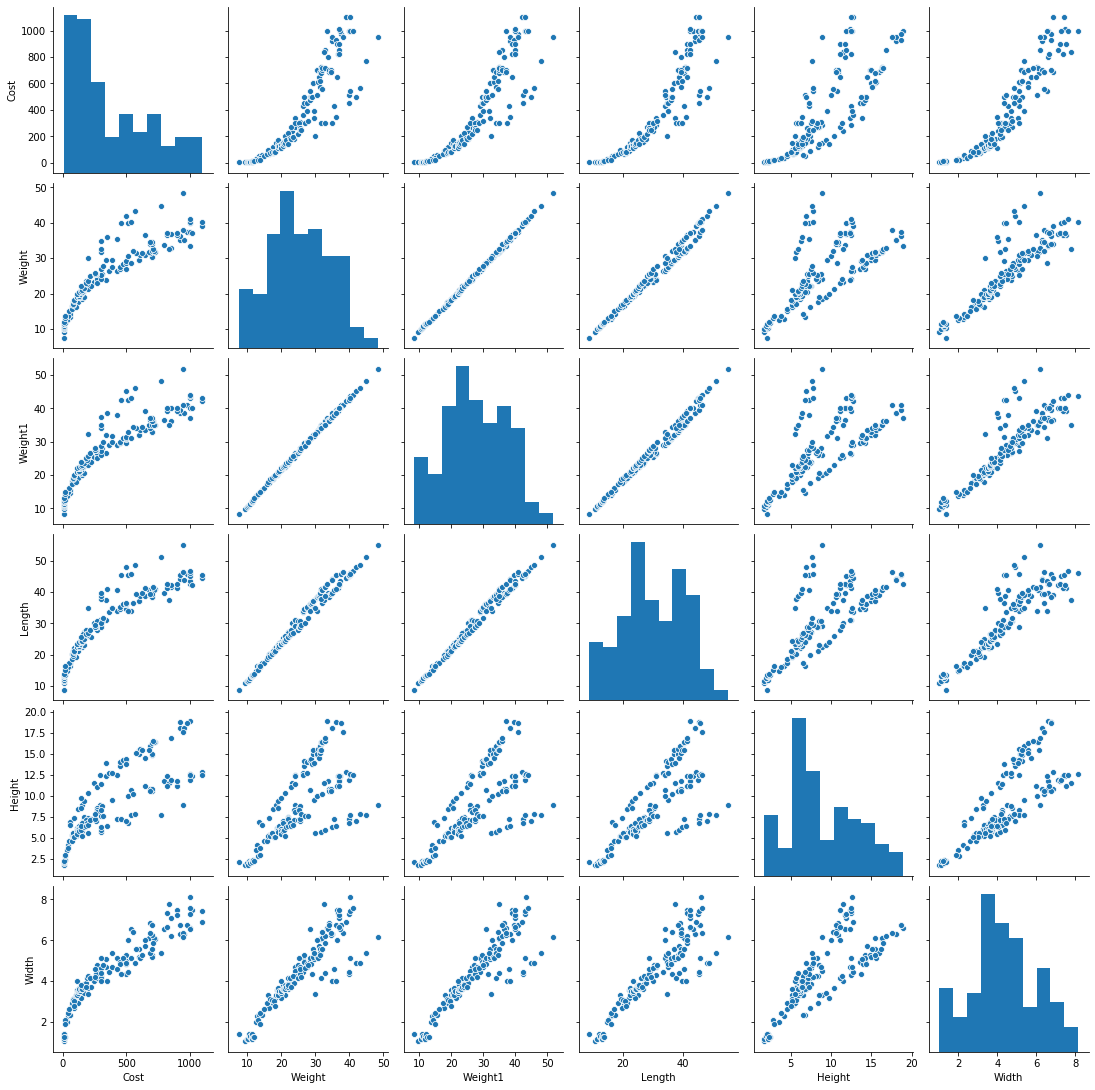

In [315]:
# pairplot shows the correlation of with each other.
sns.pairplot(bagdata)
plt.show()

    # Inference:
    #Looks like Weight and Weight1 are almost similar.
    #Thier relationship with the cost is also similar.
    #Lets understnad more about these in the correlatons before we take any further decison ont them

# Correlation

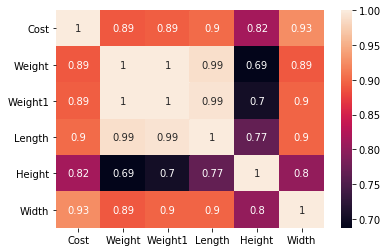

In [316]:
# Finding the relations between the variables.

correlation= bagdata.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [317]:
correlation

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.890155,0.894373,0.902653,0.815435,0.926332
Weight,0.890155,1.000000,0.999384,0.990171,0.687261,0.890990
Weight1,0.894373,0.999384,1.000000,0.992741,0.703293,0.897611
Length,0.902653,0.990171,0.992741,1.000000,0.767474,0.898065
Height,0.815435,0.687261,0.703293,0.767474,1.000000,0.802828
Width,0.926332,0.890990,0.897611,0.898065,0.802828,1.000000


    # Inference:
        # Weight and Weight1 are almost having the same effect on cost.
    # Action:
        #Since Weight1 has more effect on Cost, we will drop Weight from the data set.

In [318]:
bagdata = bagdata.drop('Weight',axis=1)
bagdata

,Cost,Weight1,Length,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [319]:
# time to set our dependent and independent feaures in a seperate array.
b = bagdata['Cost'].values.reshape(-1,1)
a = bagdata.drop('Cost',axis=1)

In [320]:
# using sclarer funciton to scale the values.
# this is used as all independent features may be of differnt magnitude.
# scaling helps set the data in a normal distribution
col = a.columns
scaler = StandardScaler()
a = pd.DataFrame(scaler.fit_transform(a),columns=col)

In [321]:
# split the data into test and train.
# 80% is training data
# 20% is test data
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

# Model Building using Multiple Linear Regression

## 1.Solving normal equations

In [322]:
# now lets train our model

# create an instance of Linear regression class 
linreg = LinearRegression() 

#trainign the algorithm, with training data
linreg.fit(a_train, b_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
# lets find the intercept and slope

# intercept:
intr = linreg.intercept_ 

# slope/coefficent:
coef = linreg.coef_


print("Intercept = ",intr)
print("Slope = ",coef)

Intercept =  [373.62030764]
Slope =  [[ 450.69281171 -362.51973876  126.17261689  109.83982462]]


In [324]:
# we can now predit, since we have trained our model:
b_pred = linreg.predict(a_test)

In [325]:
# time to find error of our predicted model

# Mean Absolute Error:
MSA = metrics.mean_absolute_error(b_test, b_pred)

# Mean Squared Error:
MSE =  metrics.mean_squared_error(b_test, b_pred)

# Root Mean Squared Error:
RMSE = np.sqrt(MSE)

# R2

R2 = linreg.score(a,b)


print('Mean Absolute Error = ', MSA)  
print('Mean Squared Error = ', MSE)  
print('Root Mean Squared Error = ', RMSE)
print('R2 = ', R2)

Mean Absolute Error =  88.99130930067312
Mean Squared Error =  10835.034709822632
Root Mean Squared Error =  104.09147280071808
R2 =  0.8990072760703158


# # 2.Stochastic Gradient Descent Algorithm

In [326]:
# stochastic gradient descent algorithm
sg=SGDRegressor(max_iter=5000,eta0=0.001,tol=0.01)
sg.fit(a_train, b_train)

C:\Users\yasha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.01, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [327]:
# lets find the intercept and slope

# intercept:
intr = sg.intercept_ 

# slope/coefficent:
coef = sg.coef_


print("Intercept = ",intr)
print("Slope = ",coef)

Intercept =  [372.8556473]
Slope =  [ 67.7698559   33.46263492  59.08718467 150.29467026]


In [328]:
# we can now predit, since we have trained our model:
b_pred = sg.predict(a_test)

In [329]:
# time to find error of our predicted model

# Mean Absolute Error:
MSA = metrics.mean_absolute_error(b_test, b_pred)

# Mean Squared Error:
MSE =  metrics.mean_squared_error(b_test, b_pred)

# Root Mean Squared Error:
RMSE = np.sqrt(MSE)

# R2

R2 = sg.score(a,b)


print('Mean Absolute Error = ', MSA)  
print('Mean Squared Error = ', MSE)  
print('Root Mean Squared Error = ', RMSE)
print('R2 = ', R2)

Mean Absolute Error =  90.10534678477602
Mean Squared Error =  11067.34985041394
Root Mean Squared Error =  105.20147266276238
R2 =  0.894461552721375


# # 3.Batch Gradient Descent Algorithm

In [330]:
# function to calculate the loss/ error.

def loss_func(w,i,j):
    m = len(j)
    j_pred = i.dot(w)
    loss = (1/(2*m))*np.sum(np.square(j_pred-j))
    return loss

In [331]:
# function to calculate the slope/gradient.

def gradient_d(i,j,w,eta=0.01,itr=100):
    '''
    #function which calculates the slope/gradeint for given i and j. 
    
        where
        i = feature tuple
        j = respone vecor
        w = theta vector
        eta = learning rate/eta
        itr = iterations
  
    '''
    # = number of records in the feauture set
    n = len(j)
    
    # initializing the loss function array of size of the number of iterations.
    loss_list = np.zeros(itr)
    
    # theta list is the co-efficients array of size of the iteratons X no of coefficeints.
    theta_list = np.zeros((itr,w.shape[0]))
    
    
    for itr in range(itr):
        
        #find the value using J, using the coefficients passed for every feature.
        j_pred = np.dot(i,w)
       
        # Gradient descent algorithm applied here.
    
        w = w -(1/n)*eta*( i.T.dot((j_pred - j)))
        theta_list[itr,:] =w.T
        loss_list[itr]  = loss_func(w,i,j)
        
    return w, loss_list, theta_list
  

In [332]:
# Invoke the gradient descent formula

lr =0.005
itr = 10000
'''
        where
        lr = learning rate/eta
        itr = iterations
  
'''
# initialize all constants to be zeroes.
w = np.zeros(1+a_train.shape[1]).reshape(-1,1)

# since the co-efficients/theta matrix is 5 X 1, we need to add a dummy feature to our feature tuple
# so we add a list of ones.

a_train_ = np.c_[np.ones((len(a_train),1)),a_train]

# invoke
theta,loss_list,theta_list = gradient_d(a_train_,b_train,w,lr,itr)

# print theta and final loss.

print('theta_vector= ', theta.T)
print('Final cost/MSE= ', loss_list[-1])

theta_vector=  [[372.79272555  82.03133722  11.49364519  60.33845437 156.9680143 ]]
Final cost/MSE=  4978.708822428813


In [333]:
def pred(a,w):
    return a.dot(w)

In [334]:
a_test_ = np.c_[np.ones((len(a_test),1)),a_test]
b_pred = pred(a_test_,theta)

In [335]:
# time to find error of our predicted model

# Mean Absolute Error:
MSA = metrics.mean_absolute_error(b_test, b_pred)

# Mean Squared Error:
# 
MSE = loss_list[-1]

# Root Mean Squared Error:
RMSE = np.sqrt(MSE)

# R2

R2 = metrics.r2_score(b_test,b_pred)


print('Mean Absolute Error = ', MSA)  
print('Mean Squared Error = ', MSE)  
print('Root Mean Squared Error = ', RMSE)
print('R2 = ', R2)


Mean Absolute Error =  90.45739822290996
Mean Squared Error =  4978.708822428813
Root Mean Squared Error =  70.55996614532077
R2 =  0.8823151327383683


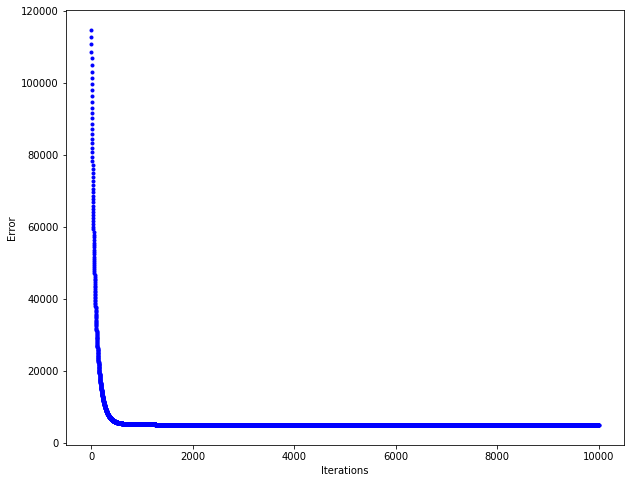

In [336]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Error')
ax.set_xlabel('Iterations')
ax.plot(range(itr),loss_list,'b.')
plt.show()

In [337]:
# since b_test, b_pred are 2-Dimensional arrays, we need to flatten them to save to a new data frame.
b_test_flat = b_test.flatten()
b_pred_flat = b_pred.flatten()

pred_bagcost = pd.DataFrame({'Actual': b_test_flat, 'Predicted': b_pred_flat})

print(pred_bagcost)

    Actual   Predicted
0    720.0  713.191689
1    110.0  233.766426
2     12.2 -158.168404
3    556.0  647.426974
4    700.0  664.083484
5    390.0  480.406640
6    160.0  244.596534
7    320.0  413.963913
8    306.0  403.578258
9    820.0  736.461557
10   950.0  776.844957
11   120.0  186.473878
12   500.0  563.612971
13   270.0  337.548487
14   514.0  592.011298
15   110.0  175.403647
16   975.0  864.359097
17   456.0  489.666916
18     5.9 -191.153339
19  1100.0  859.017111
20   188.0  292.091927
21   450.0  513.635058
22   567.0  582.117470
23     8.7 -175.494085
24    78.0  101.473690
25   300.0  431.941408
26   125.0  195.509672
27    60.0   27.135845
28   170.0  233.302795
29    80.0  116.700058
30   700.0  596.570763


# # 4.Mini Batch Gradient Descent Algorithm

 Mini Batch is basically creating smaller batches of the larger data set and applying Gradient descent algorithm

In [338]:
# function to calculate the loss/ error.

def loss_function(w,i,j):
    m = len(j)
    i_ = np.c_[np.ones((len(i),1)),i]
    j_pred = i_.dot(w)
    loss = (1/(2*m))*np.sum(np.square(j_pred-j))
    return loss

In [339]:
#  This is the hypothesis function to calculate the predicted value using the intialized theta

def dot_func (theta, x) :
        x_ = np.c_[np.ones((len(x),1)),x]
        out = np.dot(x_, theta)
        return out

In [340]:
def gradient_batch(theta,x,y):
    x_ = np.c_[np.ones((len(x),1)),x]
    theta_n = - np.average((y - dot_func(theta, x)) * x_, axis= 0)
    theta_n = theta_n.reshape((theta_n.shape[0], 1))
    return theta_n

In [341]:
def mb_gradient_func (w_b, X, Y, eta, itr, batch):
        #initialize a zero array for cost.
        cost_list = np.zeros(itr)
        for i in range(itr) :
            n = len(X)
            for j in range(0, n, batch_size):
                #creating smaller bacthes of size batch passed as input
                X_m_b = X[j:j+batch_size]
                Y_m_b = Y[j:j+batch_size]
                
                gr = gradient_batch(w_b, X_m_b, Y_m_b)
                w_b = w_b - eta * gr
            cost_list[i] = loss_function(w_b, X, Y)
             
        return w_b, cost_list

In [342]:
# invoke the mini batch gradient descent steps.

''' 
where
    w_b = Initial zero co-efficeints
    lr_b = learning rate
    itr_b = Iterations
    batch = Batch size
'''

# initialize all constants to be zeroes.
w_b = np.zeros(1+a_train.shape[1]).reshape(-1,1)
lr_b =0.1
itr_b=5000
batch=40



w_b_out, loss_list_b = mb_gradient_func(w_b, a_train, b_train,lr_b, itr_b,batch)
print("Theta ", w_b_out.T)
print("Loss ",loss_list_b[-1])

Theta  [[ 374.65043841  352.58166077 -263.72071595  106.1991738   113.40687327]]
Loss  4846.065540859479


In [343]:
b_g_pred = pred(a_test_,w_b_out)

In [344]:
# since b_test, b_pred are 2-Dimensional arrays, we need to flatten them to save to a new data frame.
b_test_flat = b_test.flatten()
b_g_pred_flat = b_g_pred.flatten()

pred_bagcost = pd.DataFrame({'Actual': b_test_flat, 'Predicted': b_g_pred_flat})

print(pred_bagcost)

    Actual   Predicted
0    720.0  688.957740
1    110.0  231.274214
2     12.2 -123.062156
3    556.0  644.547809
4    700.0  654.327617
5    390.0  459.431598
6    160.0  229.457953
7    320.0  426.875196
8    306.0  395.496369
9    820.0  734.517345
10   950.0  763.567737
11   120.0  205.597588
12   500.0  559.879208
13   270.0  335.206818
14   514.0  614.036750
15   110.0  171.945382
16   975.0  877.577392
17   456.0  499.279087
18     5.9 -160.578921
19  1100.0  857.132097
20   188.0  300.584758
21   450.0  500.129701
22   567.0  597.802933
23     8.7 -160.937649
24    78.0   97.930873
25   300.0  442.549628
26   125.0  201.371260
27    60.0   56.138059
28   170.0  248.895829
29    80.0  141.981681
30   700.0  581.368999


In [345]:
# time to find error of our predicted model

# Mean Absolute Error:
MSA = metrics.mean_absolute_error(b_test, b_g_pred)

# Mean Squared Error:
#MSE =  metrics.mean_squared_error(b_test, b_pred)
MSE = loss_list_b[-1]

# Root Mean Squared Error:
RMSE = np.sqrt(MSE)

# R2
R2 = metrics.r2_score(b_test,b_g_pred)


print('Mean Absolute Error = ', MSA)  
print('Mean Squared Error = ', MSE)  
print('Root Mean Squared Error = ', RMSE)
print('R2 = ', R2)

Mean Absolute Error =  90.8731088681191
Mean Squared Error =  4846.065540859479
Root Mean Squared Error =  69.61368788434844
R2 =  0.8856095743728805


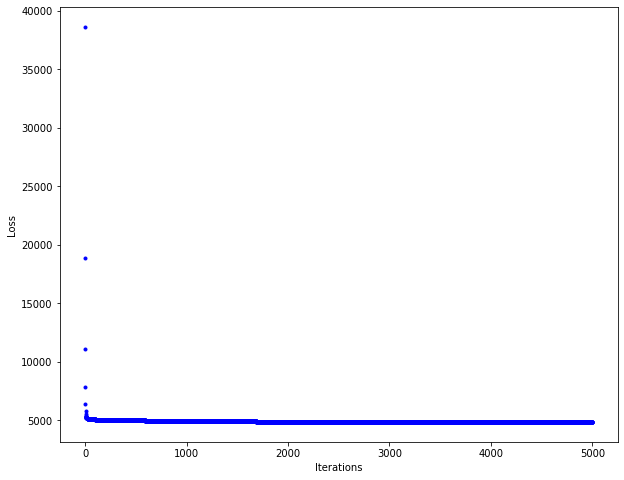

In [346]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.plot(range(itr_b),loss_list_b,'b.')
plt.show()